In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
import pycountry

from skimage import data
from PIL import Image
import base64
from io import BytesIO

In [139]:
def app_graphs(dataframe, title, unit):
    """
    Creates a set of trade graphs separated by appendix with data from a given dataframe
    
    Args:
        title (str): title of the graph
        dataframe(pandas.DataFrame): dataframe with year and columns for each appendix
    
    Returns:
        fig (matplotlib.figure): figure with graphs
    
    """
    
    fig, axs = plt.subplots(1,3, figsize=(18,5))
    
    fig.suptitle(title, size=20)
    fig.subplots_adjust(top=.85)
    
    appendices = ["I","II","III"]
    colors = sns.color_palette("Set2",3)

    for (num,app) in enumerate(appendices):
        cur_ax = axs[num]
        sns.lineplot(data=dataframe, x="year", y=app, ax=cur_ax, color=colors[num])
        cur_ax.set_title(f"Appendix {app}", size=15)
        cur_ax.set_ylabel("")
        plt.ticklabel_format(style='plain', axis='y')
    
    axs[0].set_ylabel(f"{unit} Traded", size=15)
    
    return fig

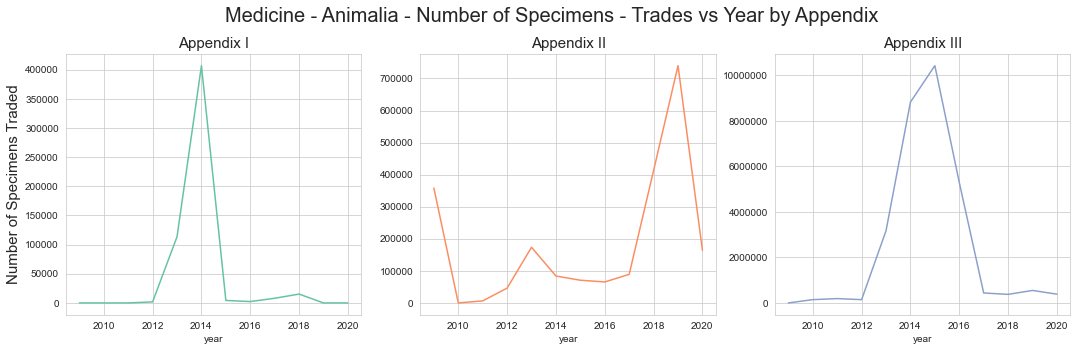

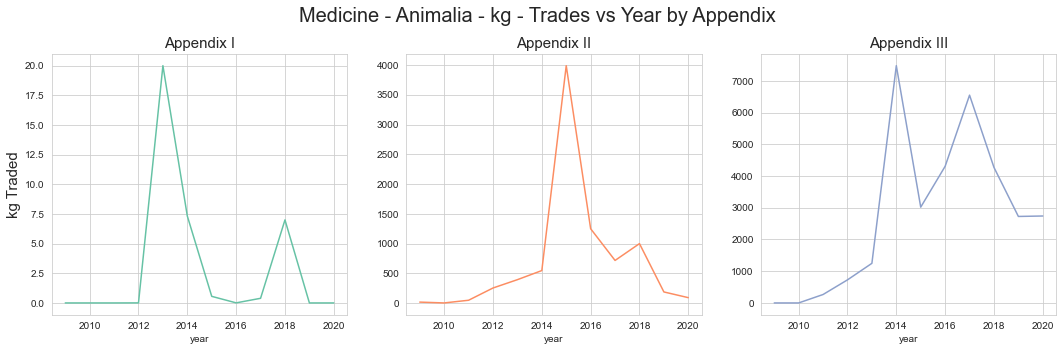

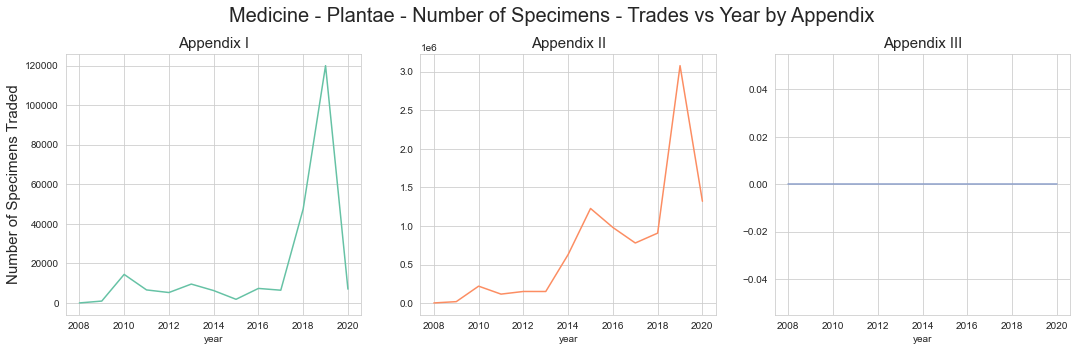

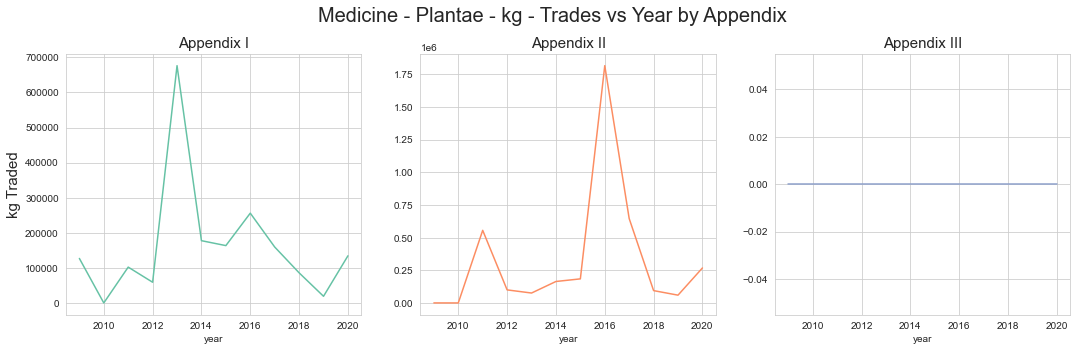

In [140]:
output_root = "query_outputs/medical/medicine/"
# distionary for filter and path
med_list = [("Animalia", "Number of Specimens", "Animalia/specimen/specimen_medicine_animalia_trades_per_year_by_app.csv"),
            ("Animalia", "kg", "Animalia/kg/kg_medicine_animalia_trades_per_year_by_app.csv"),
            ("Plantae", "Number of Specimens", "Ex-Animalia/specimen/specimen_medicine_ex_animalia_trades_per_year_by_app.csv"),
            ("Plantae", "kg", "Ex-Animalia/kg/kg_medicine_ex_animalia_trades_per_year_by_app.csv")]

for kingdom, unit, path in med_list:
    # construct path to correct csv
    output_root = "query_outputs/medical/medicine/"
    output_path = output_root + path
    
    # read in the csv for graphing and create title for the graphs figure and 
    df = pd.read_csv(output_path)
    title = f"Medicine - {kingdom} - {unit} - Trades vs Year by Appendix"
    
    # graph the data
    fig = app_graphs(df, title, unit)
    
    # find directory path to save 
    dir_root = re.search("(.+(?<=/))", output_path).group()
    
    # save the figure
    fig.savefig(dir_root + title)

In [222]:
# Stacked Barchart for Medicine - Plantae - Number of Specimens - Trades vs Year Appendix II
root2 = "query_output_and_visualizations/medical/medicine/Ex-Animalia/specimen/trends/"
med2 = pd.read_csv(root2 + "medicine_ex-animalia_specimen_app_ii.csv", index_col="year")

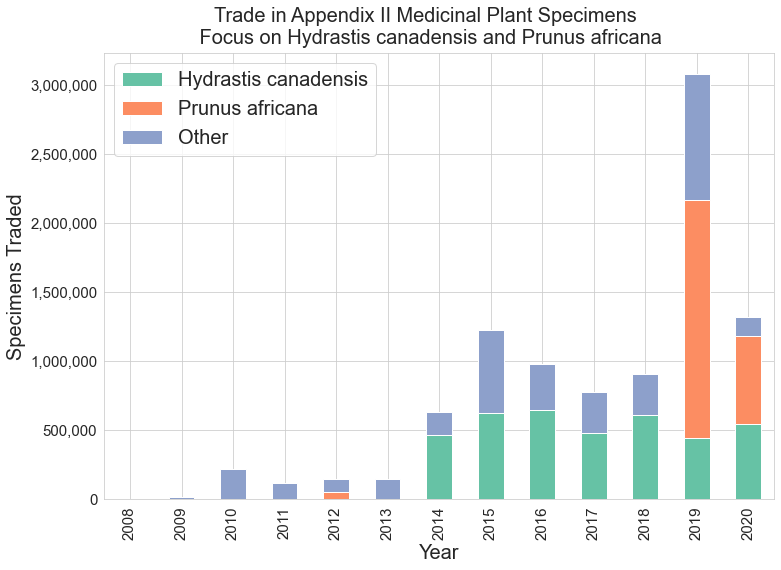

In [230]:
fig2,ax2 = plt.subplots(figsize=(12,8))
med2.plot(kind="bar", stacked=True, ax=ax2, color=sns.color_palette("Set2",3))

fig2.subplots_adjust(top=.9)
fig2.suptitle("Trade in Appendix II Medicinal Plant Specimens \n Focus on Hydrastis canadensis and Prunus africana", 
              fontsize=20)
ax2.set_ylabel("Specimens Traded", 
               size=20)
ax2.set_xlabel("Year", 
               size=20)

ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.tick_params(axis='both', labelsize=15)

ax2.legend(fontsize=20)
fig2.savefig(root2 + "specimen_plant_med_stacked")

In [4]:
## Country plotly (Work in Progress)
# code inspired by "https://plotly.com/python/imshow/" documentation
def b64image(path):
    """
    create base64 representation of png image to optimize passing image data
    """
    prefix = "data:image/png;base64,"
    pil_img = Image.open(path)
    with BytesIO() as stream:
        # save as binary to buffer
        pil_img.save(stream, format="png")
        # encode into base64, decode bytes object into a string and attach prefix
        base64_string = prefix + base64.b64encode(stream.getvalue()).decode("utf-8")
    return base64_string


fig3 = px.scatter(country_year_spec_df, x="gdp_per_capita_yma", y="specimen_imports_per_100k_log",
                 animation_frame="year", animation_group="country_name",
                 range_x=[-1000,120000], range_y=[-20,20],
                 # hover_name="country_name", size_max=100,
                 title="Imports in CITES Specimens on a per 100k Population Basis vs Income since 1975")

# make sure regular dots don't show
fig3.update_traces(marker_color="rgba(0,0,0,0)")

# create mapping for b64 flag images
image_map = dict()

for country in country_year_spec_df["iso2_code"].unique():
    path = f"/Users/Tighe_Clough/Library/CloudStorage/OneDrive-NortheasternUniversity/Fourth Year/summer_i/CS3200/Project/Individual/endangered_db/original_data/flags/{country}.png"
    b64 = b64image(path)
    image_map[country] = b64

# map to b64 flag image
country_year_spec_df["b64"] = country_year_spec_df["iso2_code"].map(image_map)


for (i, g), fr in zip(country_year_spec_df.groupby("year"), fig3.frames):
    l = {
        "images": [
            dict(
                x=r["gdp_per_capita_yma"],
                y=r["specimen_imports_per_100k_log"],
                source= "https://github.com/matahombres/CSS-Country-Flags-Rounded/tree/master/flags/" + r["country_name"] + ".png", #r["b64"],
                xref="x",
                yref="y",
                sizex=2000,
                sizey=10,
                xanchor="center",
                yanchor="middle",
                sizing="stretch",
                opacity=0.8,
            )
            for _, r in g.iterrows()
        ]
    }
    fr.update(layout=l)

for i in fig3.frames[0].layout.images:
    fig3.add_layout_image(i)

# modify axis label properties
fig3.update_xaxes(title_font={"size":18, "family": "Courier", "color":"gray"}, 
                 tickfont = {"size":16, "family": "Courier", "color":"gray"})

fig3.update_yaxes(title_font={"size":18, "family": "Courier", "color":"gray"}, 
                 tickfont = {"size":16, "family": "Courier", "color":"gray"})

fig3.update_layout(plot_bgcolor="#dfdfdf")

fig3.show()

# Plotly General Analysis

In [3]:
## General visualization df
root3 ="https://github.com/thclough/endangered_db/blob/main/query_output_and_visualizations/general/"
year_spec_df = pd.read_csv(root3 + "yearly_specimen_trade.csv", keep_default_na=False)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 28, saw 367


In [3]:
# give Kosovo a continent
kv_idx = year_spec_df[year_spec_df.country_name=="Kosovo"].index
year_spec_df.loc[kv_idx,"continent_code"] = "EU"

In [4]:
# get rid of "world", only want on a per country basis
country_year_spec_df = year_spec_df[year_spec_df.country_name != "World"].sort_values(["year"])

In [5]:
# continents in first frame are not included, will add missing continent placeholders for plotly
missing_conts = set(country_year_spec_df.continent_code.unique()) - set(country_year_spec_df[country_year_spec_df["year"]==1975].continent_code.unique())

In [6]:
# add missing continent dumy entries for plotly
for cont in missing_conts:
    row = [[1975, "Placeholder", "PH", cont]+[np.nan]*6]
    country_year_spec_df = country_year_spec_df.append(pd.DataFrame(row , columns=country_year_spec_df.columns), ignore_index=True)

In [7]:
country_year_spec_df.sort_values(by=["year","continent_code"], inplace=True)

In [9]:
# create dictionary to map code to names for easy readability
code_name_dict = {"AF":"Africa", "AS":"Asia", "EU":"Europe", "NA":"North America", "OC":"Oceania", "SA":"South America"}

# create button list for selection of continent
# ex. [True, True, False, False] will display the fist two traces
# scatter data and corresponding OLS trend line are treated as separate traces, but ordered next to each other
# traces appear in the order the color group appears in the dataframe 
# ex. Africa is listed first in the dataframe so its scatter trace appears first and then its line trace
# to display both traces would need to set visibility list to [True, True, False,...,False]

unique_conts = country_year_spec_df.continent_code.unique()
num_conts = len(unique_conts)

# intialize button list with selection for all continents 
cont_button_list = [{"label":"All", "method":"update", "args": [{"visible":[True]*num_conts*2}]}]

for idx,cont_code in enumerate(unique_conts):
    
    # initialzie the dictionary
    button_dict = dict()
    
    # find name of the continent
    name = code_name_dict[cont_code]
    
    # create trace visibility list and citionary for plotly
    vis_list = [False] * num_conts*2
    true_idx_start = idx*2
    
    # set true for both scatter and line trace
    vis_list[true_idx_start:true_idx_start+2] = [True,True]
    args_dict = {"visible":vis_list}
    
    # set dictionary values
    button_dict["label"] = f"{cont_code} ({name})"
    button_dict["method"] = "update"
    button_dict["args"] = [args_dict]
    
    # append dictionary to button list
    cont_button_list.append(button_dict)

In [8]:
fig3 = px.scatter(country_year_spec_df, x="gdp_per_capita_yma", y="specimen_imports_per_100k_log",
                 animation_frame="year", animation_group="country_name", color="continent_code",
                 range_x=[-1000,200000], range_y=[-10,20],
                 hover_name="country_name", size_max=100, opacity=.8, trendline="ols",
                 title="Imports in CITES Specimens on a per 100k Population Basis vs Income per Capita since 1975")

fig3.layout["updatemenus"] = [
        dict(
            buttons=list(cont_button_list),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.005,
            xanchor="right",
            y=1.02,
            yanchor="top"
        ),
        # animation buttons
        {'buttons': [{'args': [None, {'frame': {'duration':
                                                      500, 'redraw': False},
                                                      'mode': 'immediate',
                                                      'fromcurrent': True,
                                                      'transition': {'duration':
                                                      500, 'easing': 'linear'}}],
                                             'label': '&#9654;',
                                             'method': 'animate'},
                                            {'args': [[None], {'frame':
                                                      {'duration': 0, 'redraw':
                                                      False}, 'mode': 'immediate',
                                                      'fromcurrent': True,
                                                      'transition': {'duration': 0,
                                                      'easing': 'linear'}}],
                                             'label': '&#9724;',
                                             'method': 'animate'}],
                                'direction': 'left',
                                'pad': {'r': 10, 't': 70},
                                'showactive': False,
                                'type': 'buttons',
                                'x': 0,
                                'xanchor': 'left',
                                'y': 0,
                                'yanchor': 'top'}
    ]

fig3.layout["annotations"] =[
        dict(text="Select Continent:", showarrow=False,
        x=.78, xref="paper", y=.95, yref="paper")
    ]

fig3.show()

In [385]:
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = JupyterDash(__name__)


app.layout = html.Div([
    html.H4('Animated GDP and population over decades'),
    html.P("Select an animation:"),
    dcc.RadioItems(
        id='selection',
        options=["GDP - Scatter", "Population - Bar"],
        value='GDP - Scatter',
    ),
    dcc.Loading(dcc.Graph(id="graph"), type="cube")
])


@app.callback(
    Output("graph", "figure"), 
    Input("selection", "value"))
def display_animated_graph(selection):
    df = px.data.gapminder() # replace with your own data source
    animations = {
        'GDP - Scatter': px.scatter(
            df, x="gdpPercap", y="lifeExp", animation_frame="year", 
            animation_group="country", size="pop", color="continent", 
            hover_name="country", log_x=True, size_max=55, 
            range_x=[100,100000], range_y=[25,90]),
        'Population - Bar': px.bar(
            df, x="continent", y="pop", color="continent", 
            animation_frame="year", animation_group="country", 
            range_y=[0,4000000000]),
    }
    return animations[selection]

app.run_server(mode="inline")

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8050): Max retries exceeded with url: /_alive_643591a8-38de-4352-9348-6d1847088d8b (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fa7d154c250>: Failed to establish a new connection: [Errno 61] Connection refused'))

Exception in thread Thread-44:
Traceback (most recent call last):
  File "/Users/Tighe_Clough/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/Tighe_Clough/opt/anaconda3/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/Tighe_Clough/opt/anaconda3/lib/python3.8/site-packages/retrying.py", line 49, in wrapped_f
    return Retrying(*dargs, **dkw).call(f, *args, **kw)
  File "/Users/Tighe_Clough/opt/anaconda3/lib/python3.8/site-packages/retrying.py", line 212, in call
    raise attempt.get()
  File "/Users/Tighe_Clough/opt/anaconda3/lib/python3.8/site-packages/retrying.py", line 247, in get
    six.reraise(self.value[0], self.value[1], self.value[2])
  File "/Users/Tighe_Clough/opt/anaconda3/lib/python3.8/site-packages/six.py", line 703, in reraise
    raise value
  File "/Users/Tighe_Clough/opt/anaconda3/lib/python3.8/site-packages/retrying.py", line 200, in call
    attempt = At